# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 


## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?


### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [ ]:
from IPython.display import Audio
import scipy
from scipy.io import wavfile
import scipy.signal as sps

In [ ]:
samplerate, data = wavfile.read("/content/drive/MyDrive/MADE_ex/My_voice1.wav")
# samplerate - частота дискретизации, data - амплитуда по каналам

In [ ]:
samplerate, data.dtype
# 44100 - частота дискретизации, 65535 - квантованиt (число возможных значений амплитуды)

(44100, dtype('int16'))

In [ ]:
Audio(data[:,0], rate=samplerate)

In [ ]:
samplerate

44100

In [ ]:
np.max(data, axis=0)

array([1990, 1989], dtype=int16)

In [ ]:
np.min(data, axis=0)

array([-1246, -1245], dtype=int16)

In [ ]:
data.shape

(908059, 2)

In [ ]:
import librosa
(sig, rate) = librosa.load("/content/drive/MyDrive/MADE_ex/My_voice1.wav", sr=None)

In [ ]:
len(sig)

908059

In [ ]:
Audio(data=sig, rate=rate)

In [ ]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate)

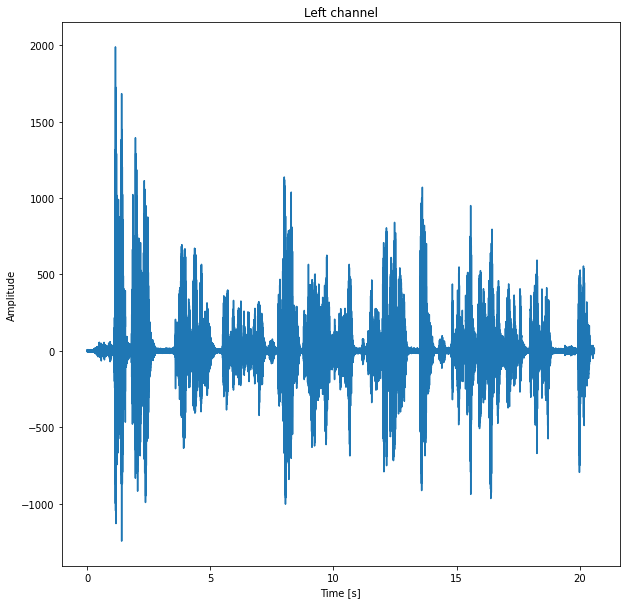

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(time, data[:,0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Left channel')
plt.show()

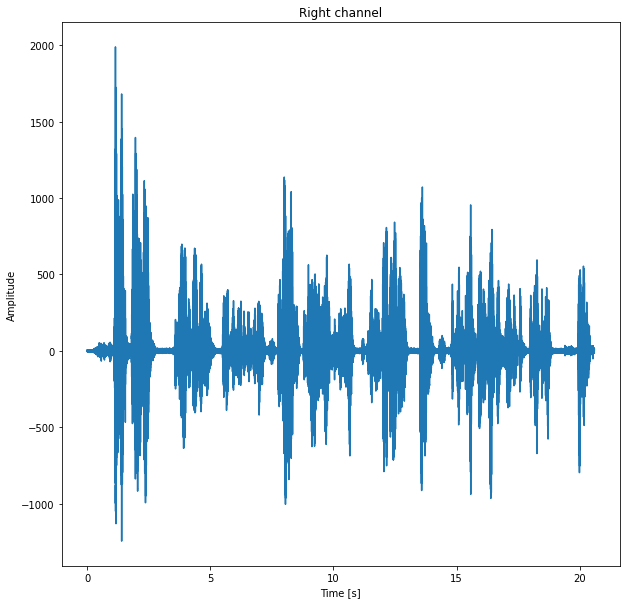

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(time, data[:,1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Right channel')
plt.show()

In [ ]:
data[:,0].astype(np.float32)

array([0., 0., 0., ..., 2., 6., 1.], dtype=float32)

In [ ]:
new_rate = 8000
# Изменение частоты дискретизации
number_of_samples = round(len(data) * new_rate / samplerate)
new_data = sps.resample(data[:, 0].astype(np.float32), number_of_samples)

In [ ]:
number_of_samples

164727

In [ ]:
new_duration = len(new_data)/new_rate
new_time = np.arange(0, new_duration, 1 / new_rate)

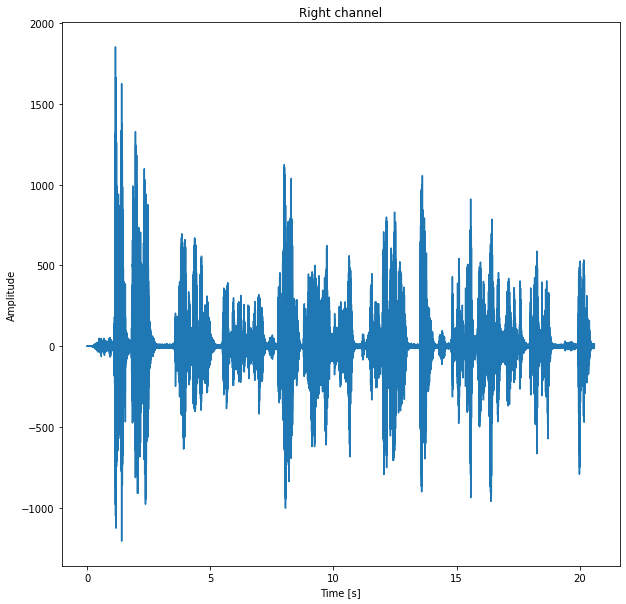

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(new_time, new_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Right channel')
plt.show()

In [ ]:
Audio(data=new_data, rate=new_rate)

In [ ]:
new_rate = 2998
# Изменение частоты дискретизации
number_of_samples = round(len(data) * new_rate / samplerate)
new_data = sps.resample(data[:, 0].astype(np.float32), number_of_samples)

new_duration = len(new_data) / new_rate
new_time = np.arange(0, new_duration, 1 / new_rate)
# Почему-то на частоте меньше 3000 Audio перестал воспроизводить аудиозапись.
# Но явно минимальная частота намного должна быть меньше

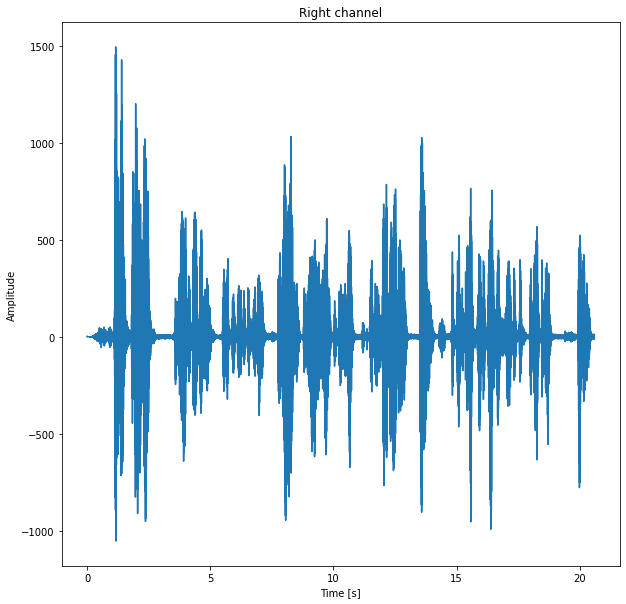

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(new_time, new_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Right channel')
plt.show()

In [ ]:
Audio(data=new_data, rate=new_rate)

In [ ]:
new_rate = 10
# Изменение частоты дискретизации
number_of_samples = round(len(data) * new_rate / samplerate)
new_data = sps.resample(data[:, 0].astype(np.float32), number_of_samples)

new_duration = len(new_data) / new_rate
new_time = np.arange(0, new_duration, 1 / new_rate)

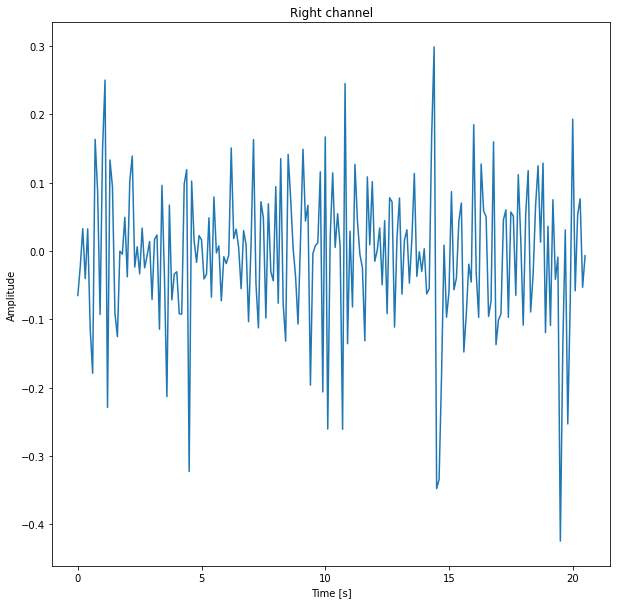

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(new_time, new_data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Right channel')
plt.show()

In [ ]:
Audio(data=new_data, rate=new_rate)

In [ ]:
# YOUR CODE HERE

2. -YOUR ANSWER HERE -
3. -YOUR ANSWER HERE -

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [ ]:
# Читаем данные с подготовленными сигналами
import pickle
# with open("resources/data.pickle", "rb") as f:
with open("/content/drive/MyDrive/MADE_ex/resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

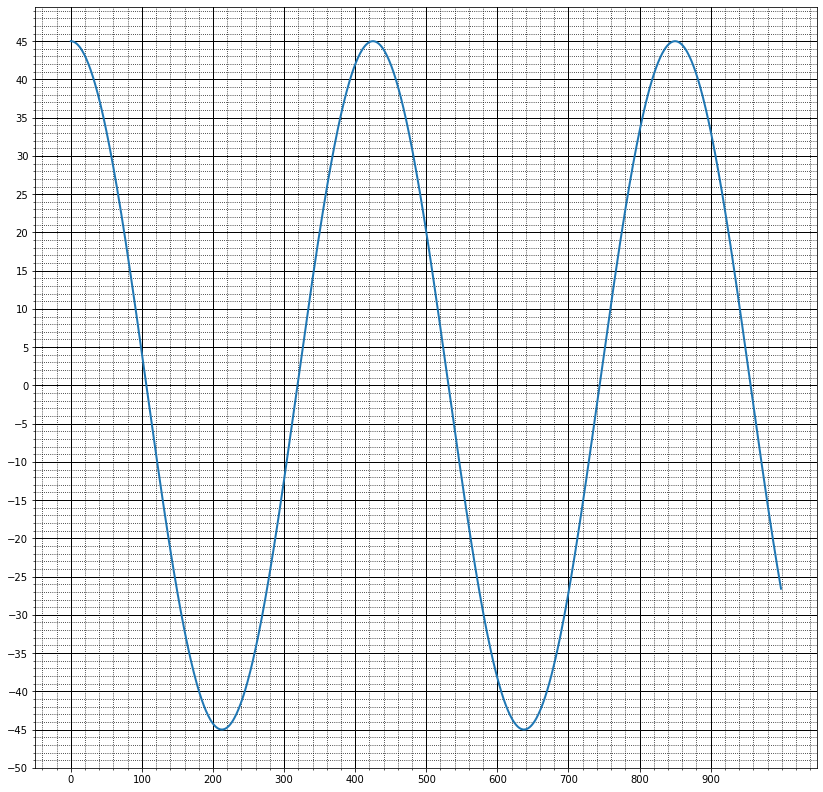

In [ ]:
draw_signal(test_data['task2']['a'])

In [ ]:
# YOUR CODE HERE
amplitude = 45
frequency = 2 * np.math.pi / 425
phase = np.math.pi * 0.5
x = np.arange(0, 1000, 1)
a = amplitude * np.sin(frequency * x + phase)

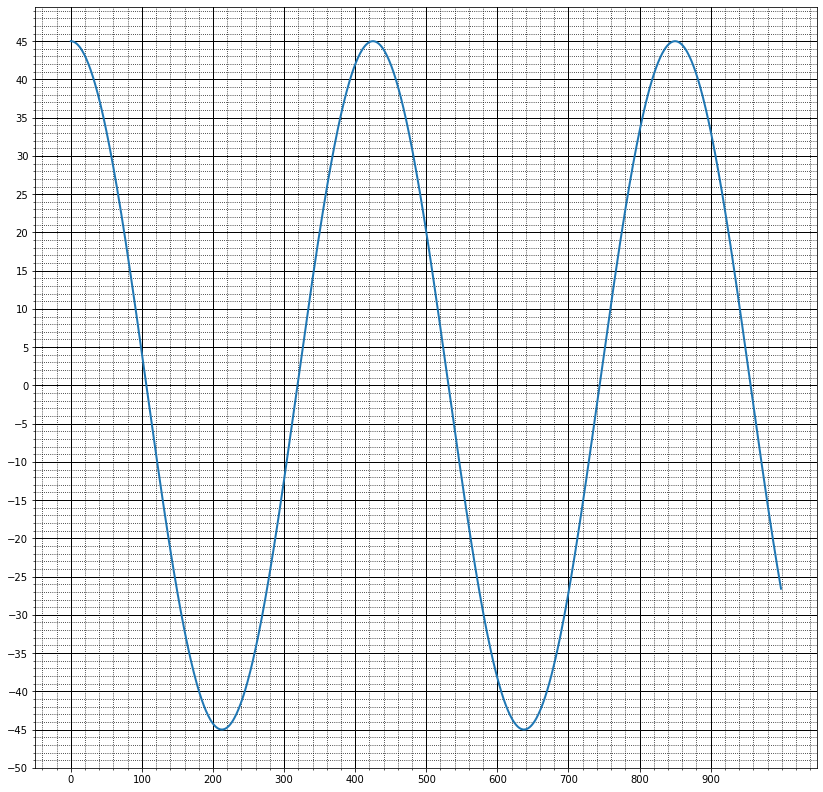

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


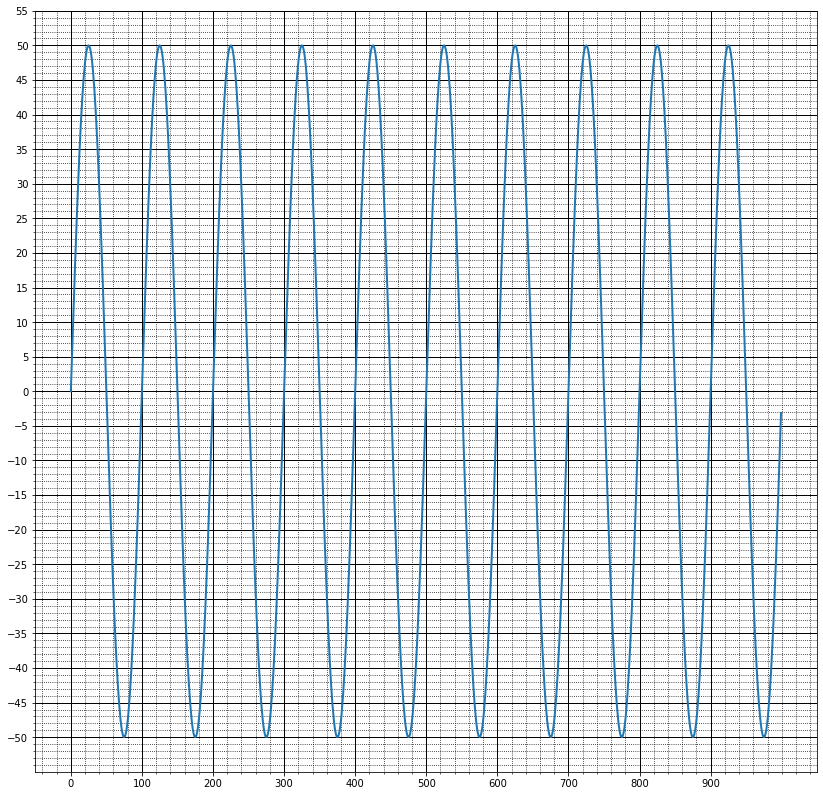

In [ ]:
draw_signal(test_data['task2']['b'])

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
amplitude = 50
frequency = 2 * np.math.pi / 100
phase = 0
x = np.arange(0, 1000, 1)
b = amplitude * np.sin(frequency * x + phase)

In [ ]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


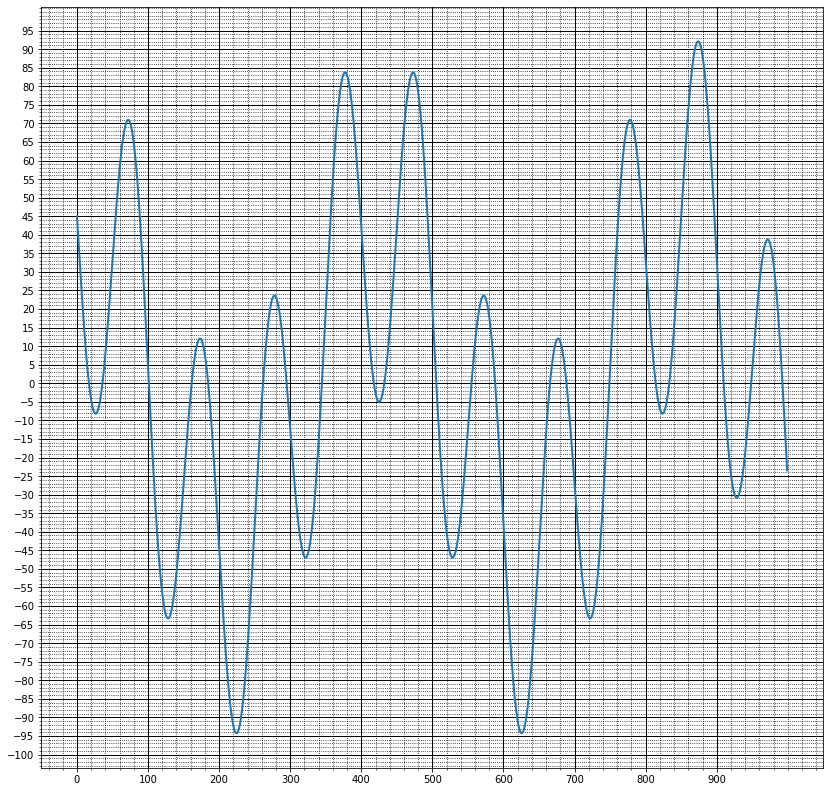

In [ ]:
draw_signal(test_data['task2']['c'])

In [ ]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
c = a - b

In [ ]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [ ]:
def convolve(in1, in2):
    N1 = len(in1)
    N2 = len(in2)
    N = N1 + N2 - 1
    y = np.zeros(N)
    m = N - N1
    n = N - N2
    in1 = np.pad(in1, (0, m), 'constant')
    in2 = np.pad(in2, (0, n), 'constant')
    #Linear convolution using convolution sum formula
    for n in range (N):
        for k in range (N):
            if n >= k:
                y[n] = y[n] + in1[n - k] * in2[k]
    return y

In [ ]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [ ]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

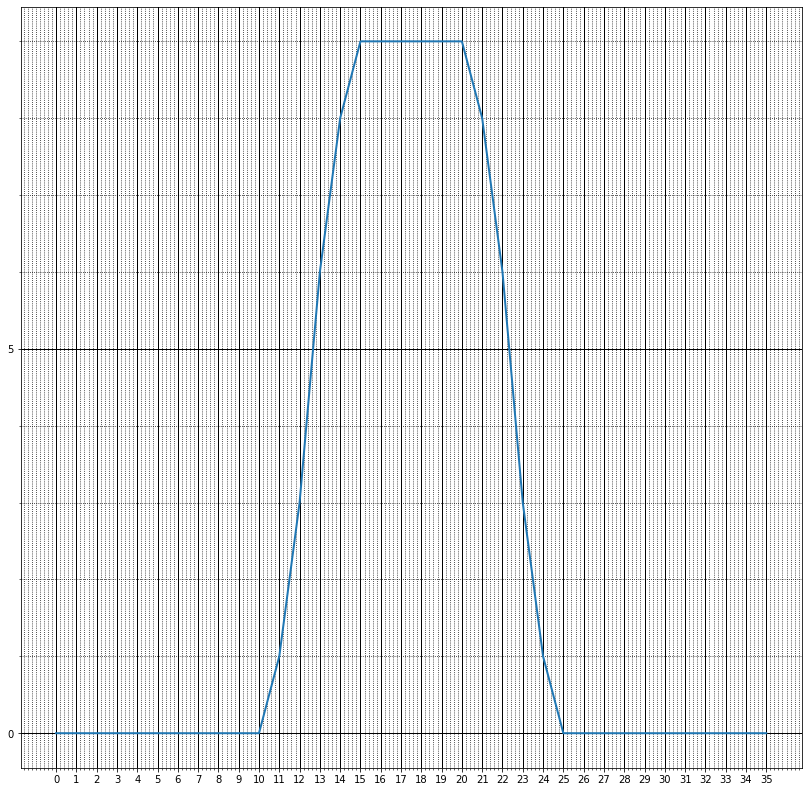

In [ ]:
# Нарисуйте результат свертки a и b
# YOUR CODE HERE
data = convolve(a, b)
plt.figure(figsize=(14, 14))
plt.plot(data, linewidth=2)
plt.minorticks_on()
plt.xticks(np.arange(0, len(data), step=1))
plt.yticks(np.arange((data.min().round())//10*10, 
                      (data.max().round())//10*10+10, step=5))
plt.grid(which='major',
    color = 'k', 
    linewidth = 1)
plt.grid(which='minor', 
    color = 'k', 
    linestyle = ':')
plt.show()

In [ ]:
test_convolve(a, b, print_debug=False)

Ok!


## Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE
    #
   
    #
    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

In [ ]:
# Попробуйте покрутить параметры генерации. 
# YOUR CODE HERE 